# P2I7 - Le pendule double

**Projet mené par :** Lomenech Nathan, Gagou Mattéo, Roche Nathan, Mauclaire Alexis

<img src="pendule_double.gif" alt="Texte alternatif" style="width:400px;height:400px;">

## Table des matières : 
1. Simulation du pendule double aux faibles angles
2. Intégration des équations du mouvement non linéaires, analyse de la réponse en fonction des conditions initiales
3. Détermination de l’angle critique à partir duquel le mouvement devient chaotique
4. Applications aux problèmes réels (théorie du Chaos et mécanique non linéaire)

## 1. Simulation du pendule aux petits angles

### Solution analytique aux petits angles :

On a le système suivant :

$\hspace{3cm} 
\begin{cases} 
(m_1 + m_2)l_1^2 \ddot{\theta}_1 + m_2l_1l_2\ddot{\theta}_2 + (m_1 + m_2)gl_1\theta_1 = 0
\\ 
m_2l_1l_2\ddot{\theta}_2 + m_2l_2^2\ddot{\theta}_2 + m_2gl_2\theta_2 = 0
\end{cases}$


Nous allons utilisé la version suivante : 

$\hspace{3cm} 
\begin{cases} 
\ddot{\theta}_1 = \frac{\mu g\theta_2 - (1+\mu)g\theta_1}{l_1}
\\ 
\ddot{\theta}_2 = \frac{(1+\mu)g \theta_1 - (1+\mu)g\theta_2}{l_2}
\end{cases}$

Avec la solution analytique exacte : 

$\hspace{3cm} 
\begin{cases} 
\theta_1^{exact}(t) = C_1 \cos(\omega_1t + \phi_1) + C_2 \cos(\omega_2t + \phi_2)
\\
\theta_2^{exact}(t) = C_2 A_1 \cos(\omega_1t + \phi_1)+C_2 A_2 \cos(\omega_2 t + \phi_2)
\end{cases}$

avec : 

$$ \omega_{1,2}^2 = \frac{g(1+ \mu)(l_1+l_2) \pm g\sqrt{(1+\mu)^2(l_1+l_2)^2 - 4(1+\mu)l_1l_2}}{2l_1l_2} $$


#### Importations :

In [3]:
import math 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import  matplotlib.animation as animation

from matplotlib.pyplot import figure, gca, xlim, show
from scipy.integrate import solve_ivp

#### Définition des conditions initiales :

In [4]:
theta1 = 0.1                            #theta 1 initial (rad)
theta2 = 0.19                            #theta 2 initial (rad)
omega1 = 0.3                              #omega 1 initial (rad/s)
omega2 = 0.02                              #omega 2 initial (rad/s)
l1 = 3                                #longeur du premier bras (m)
l2 = 2                                #longeur du deuxième bras (m)
g = 9.81                                #Acceleration terrestre (m.s^-2)
tf = 3                                 #temps de la simulation (s)
dt = 0.01                               #Pas temporel (s)
Ninc = int(tf/dt)                       #nombre d'itération
m1 = 2
m2 = 3
mu = m2/m1

t0 = 0
x0 = np.array([theta1,theta2, omega1, omega2]) #creation
t_balayage = np.linspace(t0, tf, Ninc)  #avec t_balayage2 = np.arange(t0, tf, dt) on n'atteint pas tf .. 

#### On utilise le schéma suivant pour la nomenclature des angles et longeurs :
<img src="schema.png" alt="Texte alternatif" style="width:300px;height:300px;">

#### Calcul de la solution analytique

In [5]:
#création des variables
theta_exp = np.zeros((2,Ninc))

#cacul des constantes
omega1_carre = (g*(1+mu)*(l1+l2) + g*np.sqrt((1+mu)**2*(l1+l2)**2 - 4*(1+mu)*l1*l2)/(2*l1*l2))
omega2_carre = (g*(1+mu)*(l1+l2) - g*np.sqrt((1+mu)**2*(l1+l2)**2 - 4*(1+mu)*l1*l2)/(2*l1*l2))



A1 = (1+mu)/mu - l1/(mu*g)*omega1_carre
A2 = (1+mu)/mu - l1/(mu*g)*omega2_carre


C1 = (theta2 - A2*theta1)/(A1-A2)
C2 = (A1*theta1 - theta2)/(A1-A2)

phi1 = np.arcsin((omega2-A2*omega1)/(C1*np.sqrt(omega1_carre)*(A2-A1)))
phi2 = np.arcsin((A1*omega1-omega2)/(C2*np.sqrt(omega2_carre)*(A2-A1)))


for t in range(Ninc):
    theta_exp[0,t] = C1*np.cos(omega1*t*dt + phi1) + C2*np.cos(omega2*t*dt + phi2)
    theta_exp[1,t] = C1*A2*np.cos(omega1*t*dt + phi1) + C2*A2*np.cos(omega2*t*dt + phi2)

#### Résolution numérique

In [6]:
def pendule_double_pa(t, X, l1, l2, theta1, theta2, omega1, omega2, g, m1, m2):
    theta1, omega1, theta2, omega2 = X
    
    dtheta1dt = omega1
    domega1dt = (mu*g*theta2 - (1+mu)*g*theta1)/l1
    dtheta2dt = omega2
    domega2dt = ((1+mu)*g*theta1 - (1 + mu)*g*theta2)/l2
    
    
    return [dtheta1dt, domega1dt, dtheta2dt, domega2dt]

In [7]:
sol=solve_ivp(pendule_double_pa, [t0,tf], x0, method='RK45', args = (l1, l2, theta1, theta2, omega1, omega2, g, m1, m2), t_eval=t_balayage)

Faire avec Méthode de Newmark

#### Tracé des angles en fonction du temps

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


test


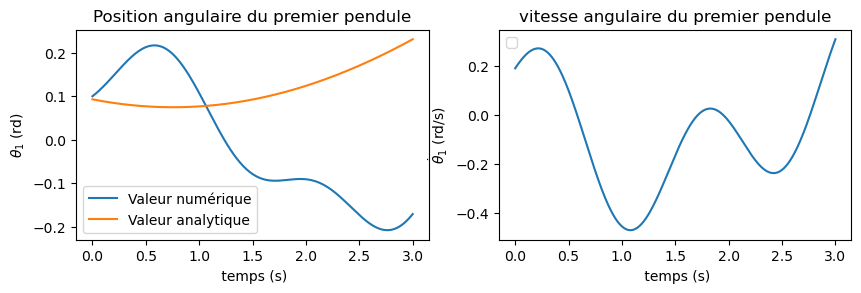

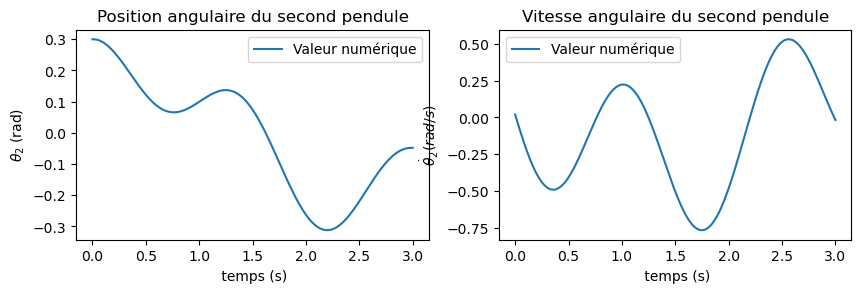

In [9]:
fig = plt.figure(figsize=(10, 6));

ax = fig.add_subplot(2,2,1);
ax.plot(sol.t,sol.y[0], label = 'Valeur numérique');
ax.plot(sol.t,theta_exp[0,:], label = 'Valeur analytique');
ax.set_xlabel(' temps (s)')
ax.set_ylabel(r'$ \theta_1 $ (rd)')
ax.set_title('Position angulaire du premier pendule')
plt.legend()

bx = fig.add_subplot(2,2,2);
bx.set_xlabel(' temps (s)')
bx.set_ylabel(r'$ \dot\theta_1 $ (rd/s)')
bx.set_title('vitesse angulaire du premier pendule')
bx.plot(sol.t,sol.y[1]);
plt.legend()

fig = plt.figure(figsize=(10, 6));

cx = fig.add_subplot(2,2,3);
cx.set_xlabel(' temps (s)')
cx.set_ylabel(r'$ \theta_2$ (rad)')
cx.set_title('Position angulaire du second pendule')
cx.plot(sol.t,sol.y[2], label = 'Valeur numérique');
plt.legend()

dx = fig.add_subplot(2,2,4);
dx.set_xlabel(' temps (s)')
dx.set_ylabel(r'$ \dot{\theta}_2 (rad/s) $')
dx.set_title('Vitesse angulaire du second pendule')
dx.plot(sol.t,sol.y[3], label = 'Valeur numérique');
plt.legend()

print("test")

In [ ]:
print("uyuzefoaugf")